In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Tariq\Downloads\vgsales.csv\vgsales.csv')

In [5]:
df.shape

(16598, 11)

In [6]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
pd.isnull(df).sum()
#check for null values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
#drop null values
df.dropna(inplace = True)

In [10]:
#change data type
df['Year'] = df['Year'].astype('int')

In [11]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [12]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000   
mean    8290.190228   2006.405561      0.265647      0.147731      0.078833   
std     4792.654450      5.832412      0.822432      0.509303      0.311879   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16291.000000  16291.000000  
mean       0.048426      0.540910  
std        0.190083      1.567345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  
max       10.570000     82.740000

In [13]:
numerical_vars = ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

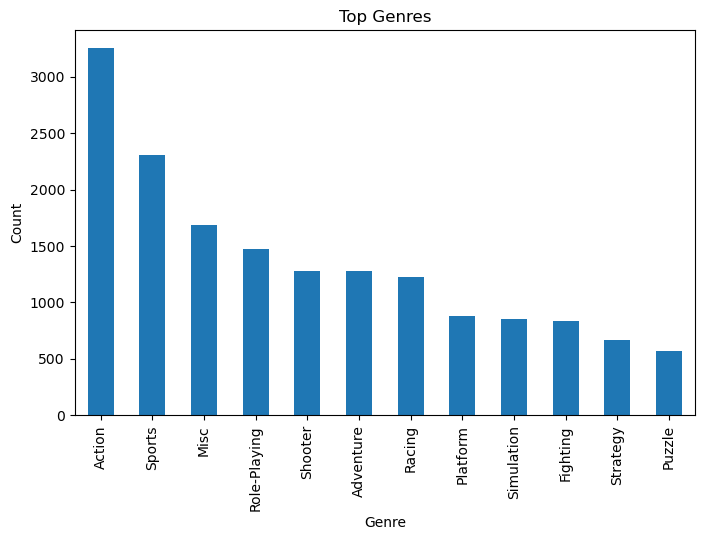

In [14]:
import matplotlib.pyplot as plt

bars = df['Genre'].value_counts()

# Plot the bar chart
bars.plot(kind="bar", title='Top Genres', figsize=(8, 5))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

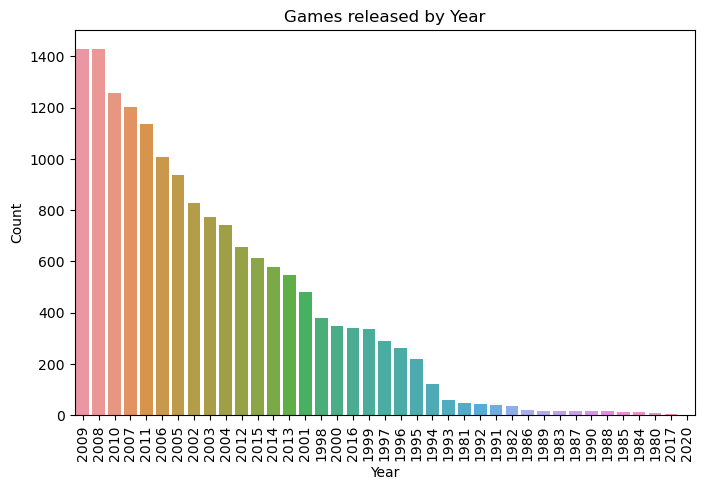

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Year", data=df, order=df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation='vertical')
plt.title('Games released by Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

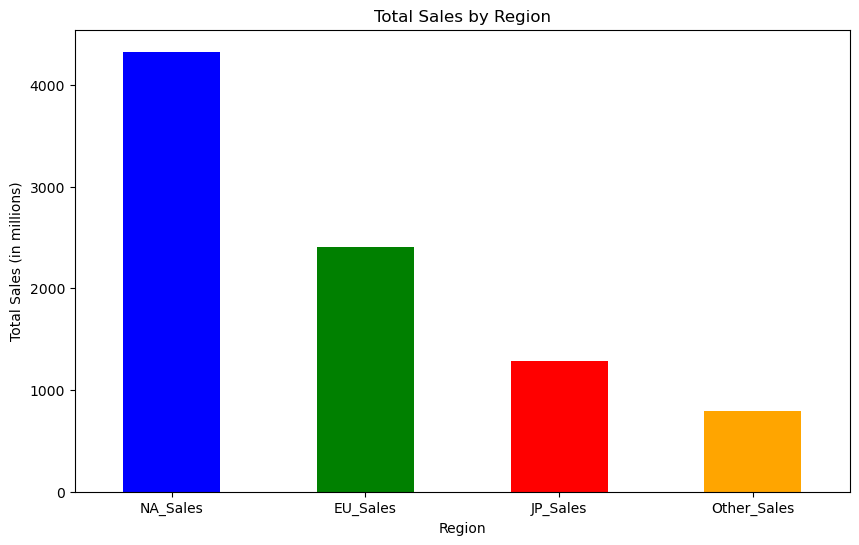

In [16]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_sales = df[regions].sum() 
plt.figure(figsize=(10, 6)) 
region_sales.plot(kind='bar', color=['blue', 'green', 'red', 'orange']) 
plt.xlabel('Region') 
plt.ylabel('Total Sales (in millions)') 
plt.title('Total Sales by Region') 
plt.xticks(rotation=0) 
plt.show()

In [17]:
vgsales_by_year= df.groupby('Year')['Global_Sales'].sum()
Year_Of_Highest_Sales= vgsales_by_year.idxmax()
print(Year_Of_Highest_Sales)

2008


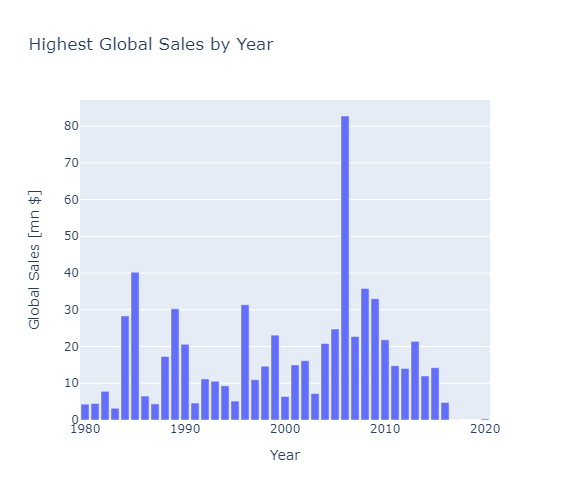

In [20]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'C:\Users\Tariq\Downloads\vgsales.csv\vgsales.csv')

highest_sales_by_year = df.groupby('Year')['Global_Sales'].max().reset_index()

fig = px.bar(highest_sales_by_year, x='Year', y='Global_Sales', title='Highest Global Sales by Year',
             labels={'Global_Sales': 'Global Sales [mn $]'}, height=500)

fig.show()


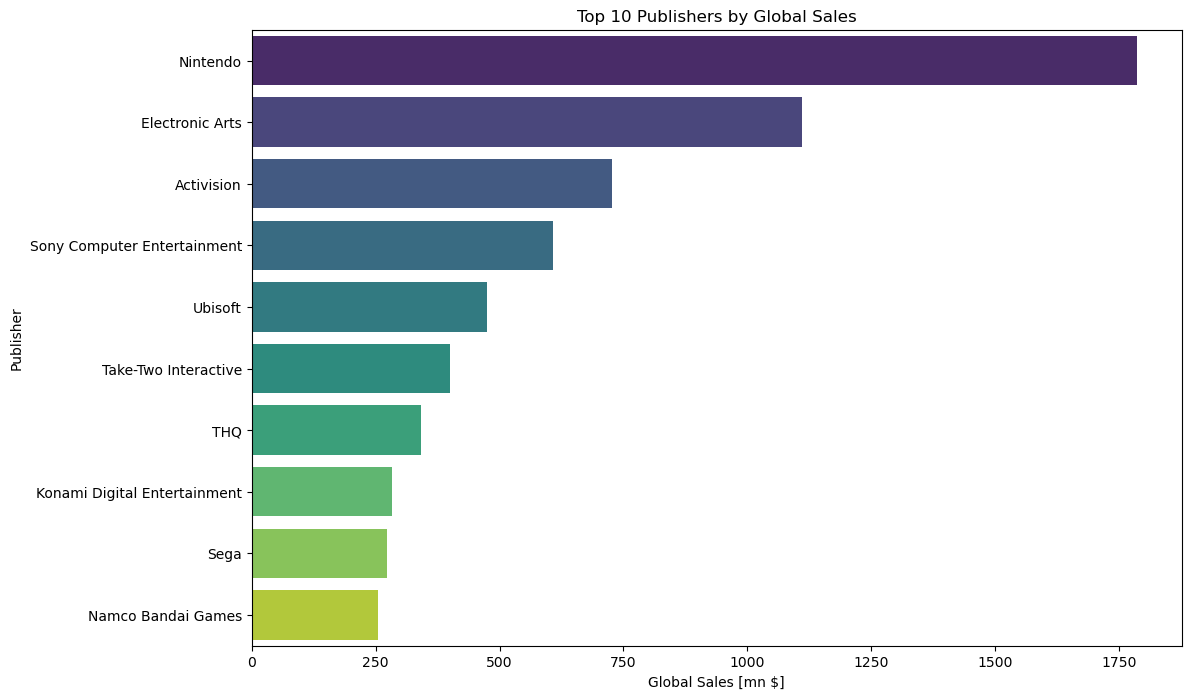

In [23]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'C:\Users\Tariq\Downloads\vgsales.csv\vgsales.csv')

publisher_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

publisher_sales['Total_Sales'] = publisher_sales['Global_Sales']

top_publishers = publisher_sales.sort_values(by='Total_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Sales', y=top_publishers.index, data=top_publishers, palette='viridis')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales [mn $]')
plt.ylabel('Publisher')
plt.show()


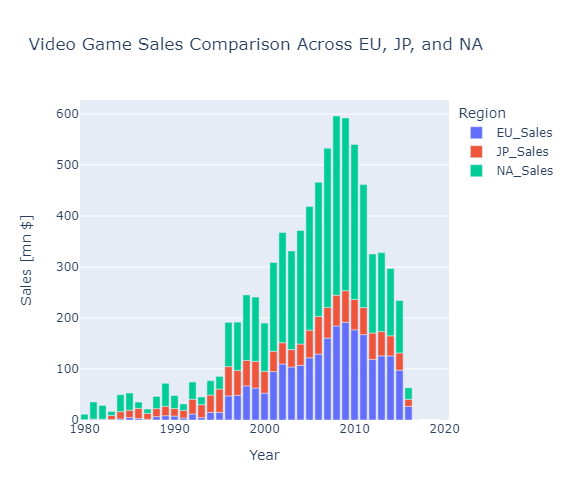

In [25]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'C:\Users\Tariq\Downloads\vgsales.csv\vgsales.csv')

sales_by_region = df.groupby('Year')[['EU_Sales', 'JP_Sales', 'NA_Sales']].sum().reset_index()

fig = px.bar(sales_by_region, x='Year', y=['EU_Sales', 'JP_Sales', 'NA_Sales'],
             title='Video Game Sales Comparison Across EU, JP, and NA',
             labels={'value': 'Sales [mn $]', 'variable': 'Region'}, height=500)

fig.show()

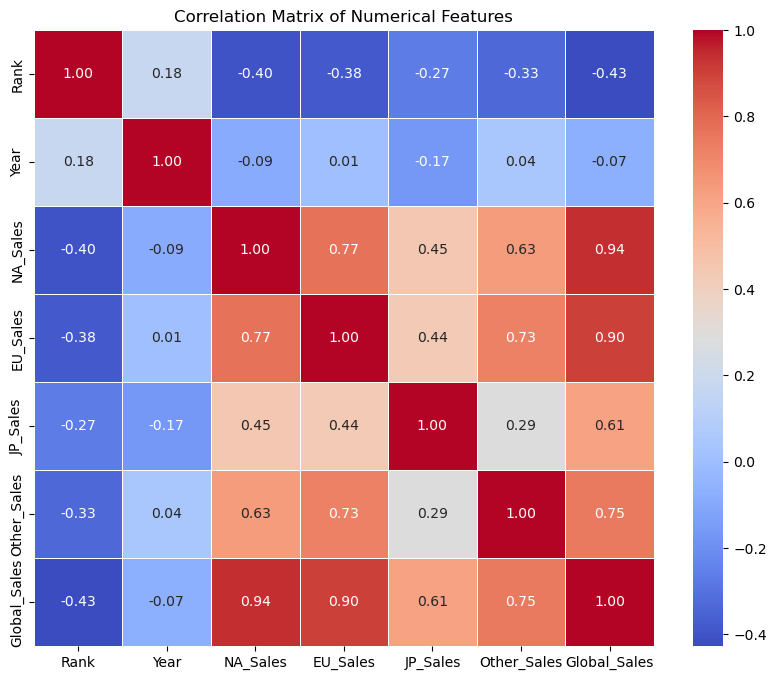

In [26]:
numerical_columns = ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
#plotting correlation matrix as heat map
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

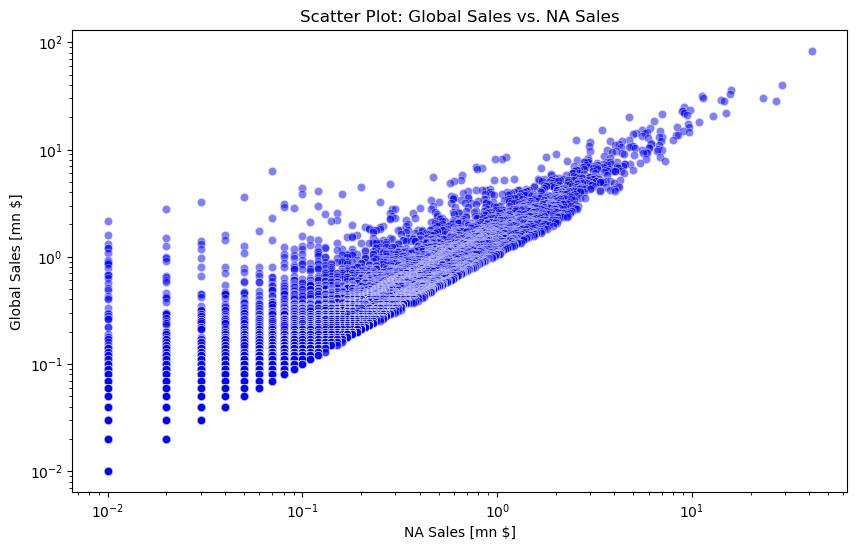

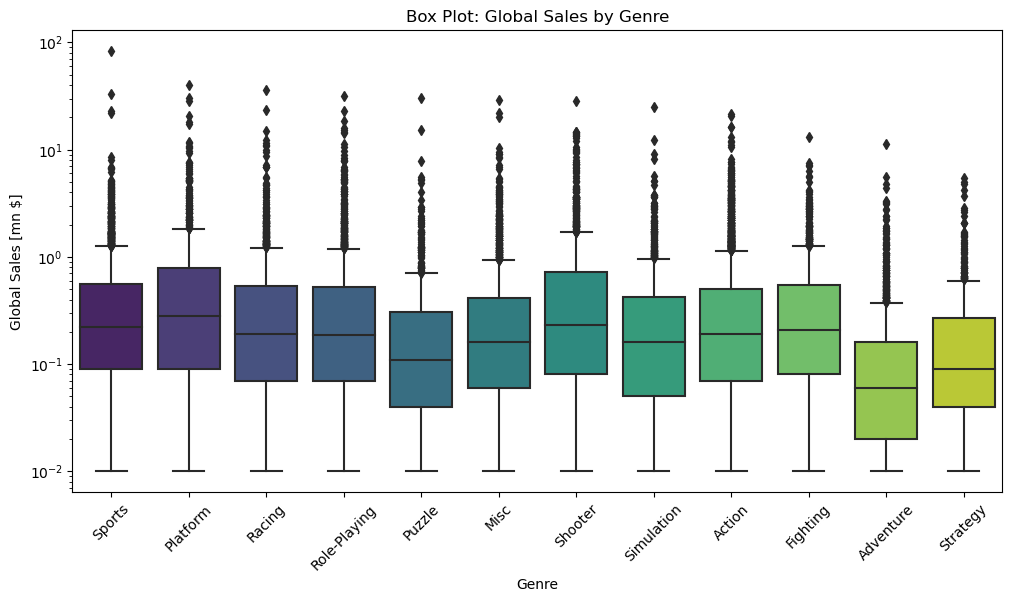

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=df, alpha=0.5, color='blue')
plt.title('Scatter Plot: Global Sales vs. NA Sales')
plt.xlabel('NA Sales [mn $]')
plt.ylabel('Global Sales [mn $]')
plt.xscale('log')  
plt.yscale('log')  
plt.show()

# Box Plot: Global Sales by Genre 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df, palette='viridis')
plt.title('Box Plot: Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales [mn $]')
plt.xticks(rotation=45)
plt.yscale('log')  
plt.show()


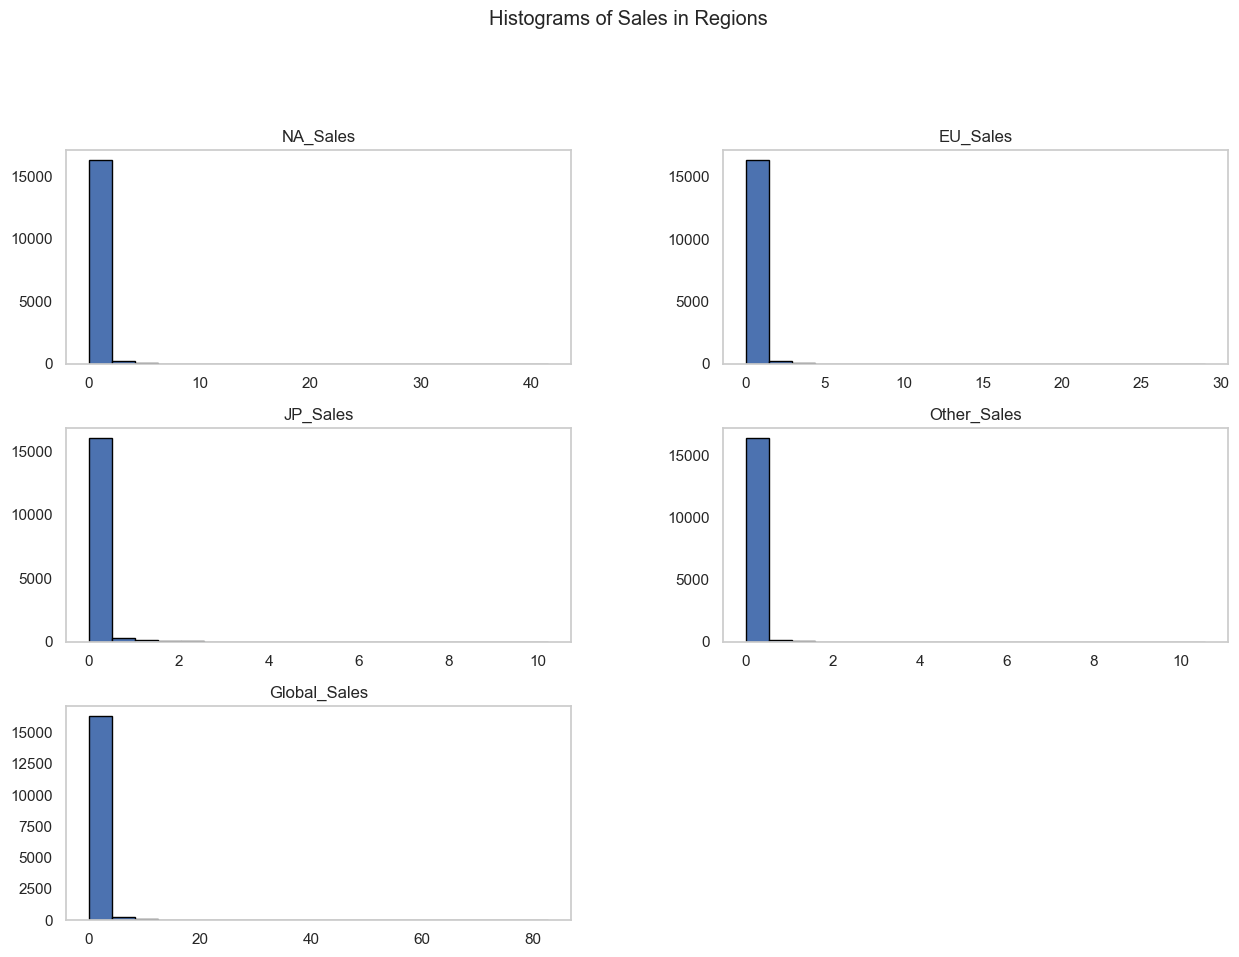

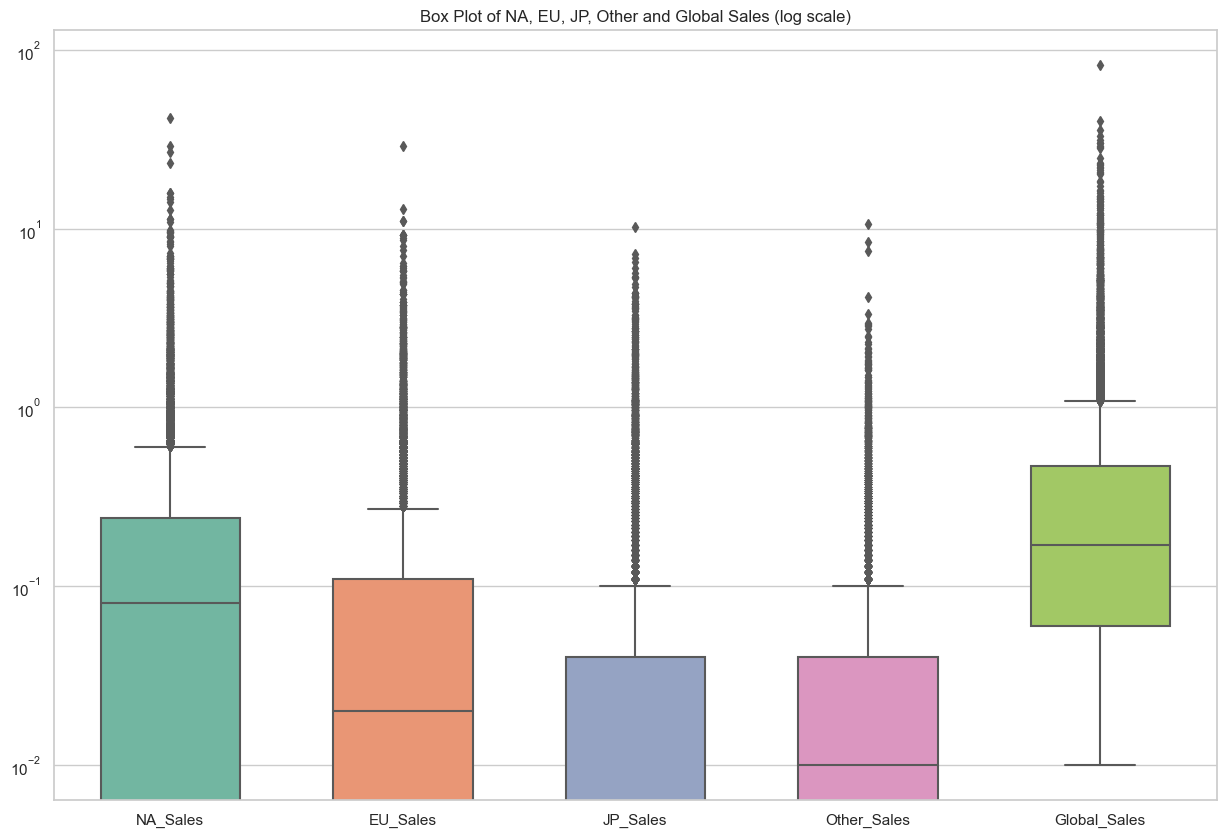

In [31]:
sns.set(style='whitegrid')

numeric_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

df[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black', grid=False)
plt.suptitle('Histograms of Sales in Regions', y=1.02)
plt.show()

sns.set(style='whitegrid', rc={'figure.figsize':(15,10)})

numeric_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Create box plots with modified scale
ax = sns.boxplot(data=df[numeric_columns], orient='v', palette='Set2', width=0.6)
ax.set_yscale('log')  # Modify the scale to logarithmic for better visualization of the data

plt.title('Box Plot of NA, EU, JP, Other and Global Sales (log scale)')
plt.show()


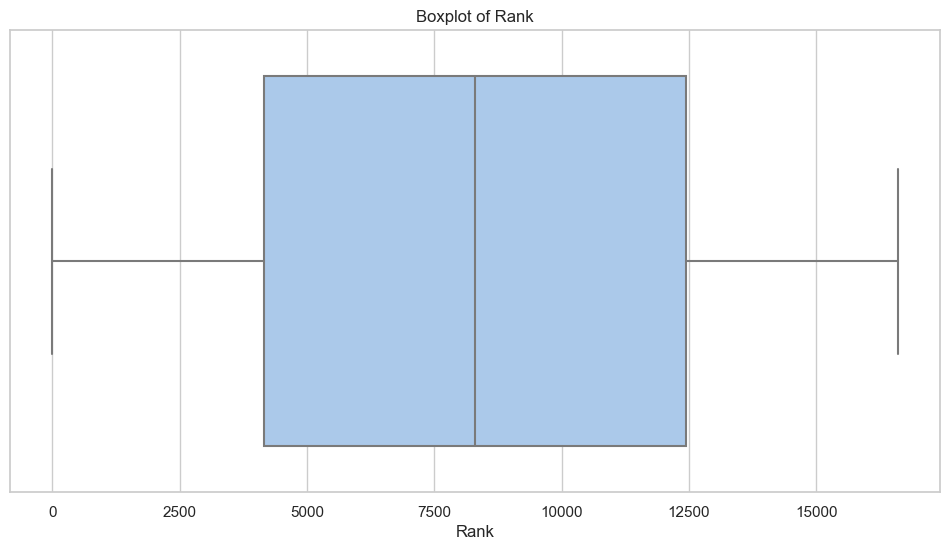

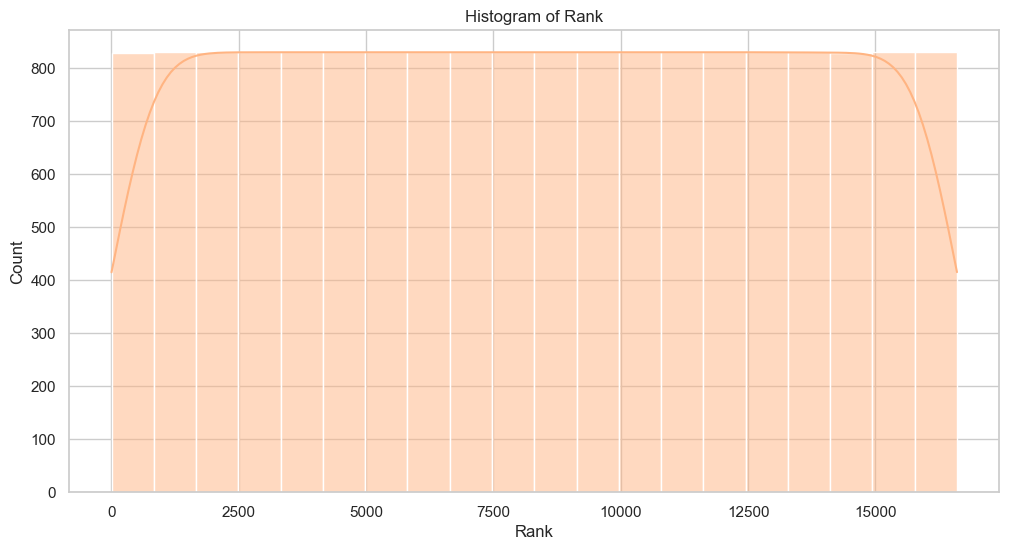

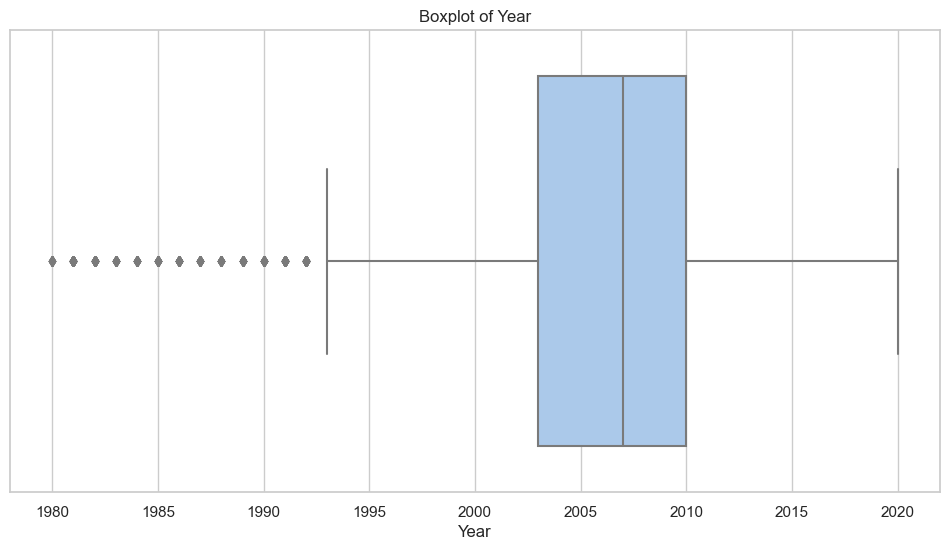

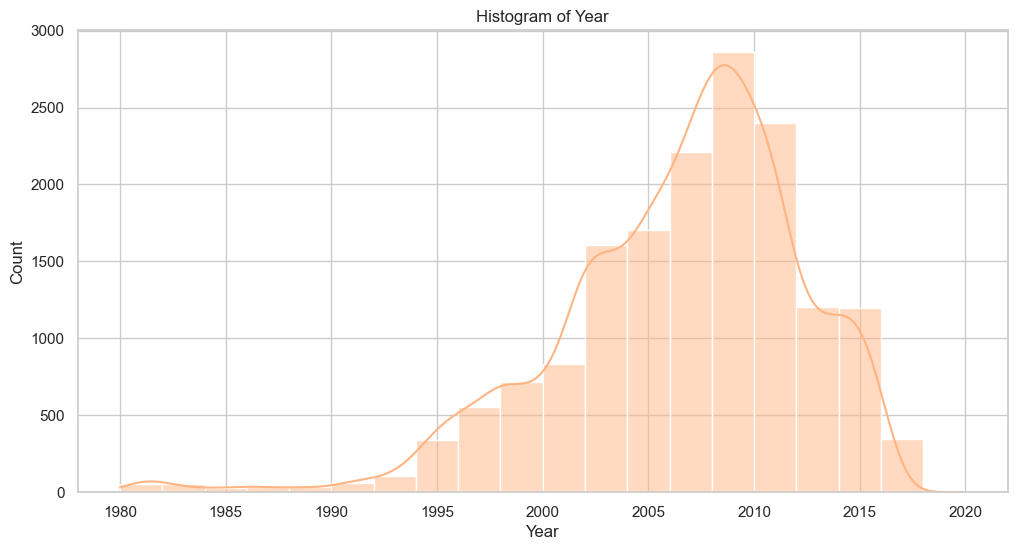

In [32]:
boxplot_color = sns.color_palette("pastel")[0]
histogram_color = sns.color_palette("pastel")[1]

# Box Plot for 'Rank'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rank', data=df, color=boxplot_color)
plt.title('Boxplot of Rank')
plt.show()

# Histogram for 'Rank'
plt.figure(figsize=(12, 6))
sns.histplot(df['Rank'].dropna(), kde=True, color=histogram_color, bins=20)
plt.title('Histogram of Rank')
plt.show()

# Box Plot and Histogram for 'Year'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', data=df, color=boxplot_color)
plt.title('Boxplot of Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Year'].dropna(), kde=True, color=histogram_color, bins=20)
plt.title('Histogram of Year')
plt.show()

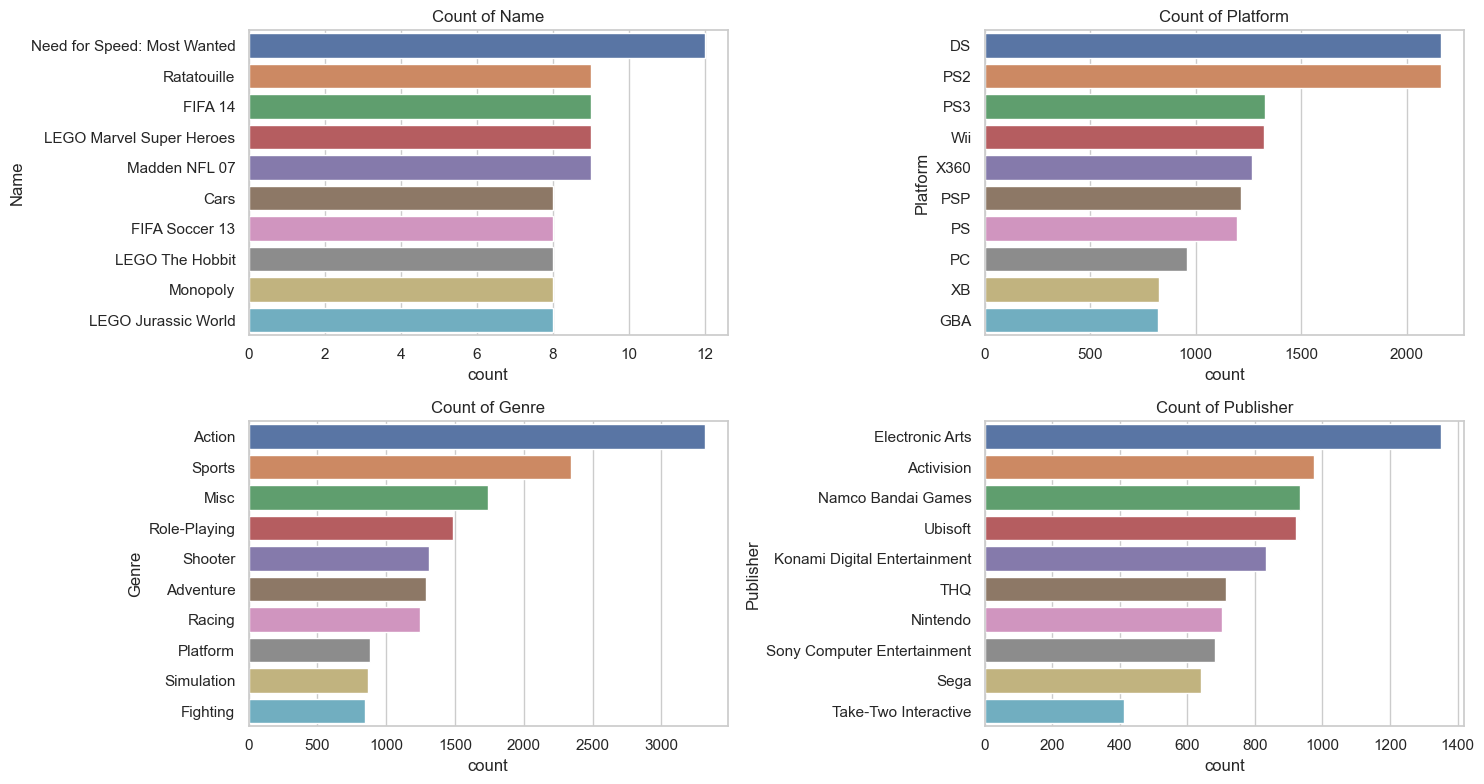

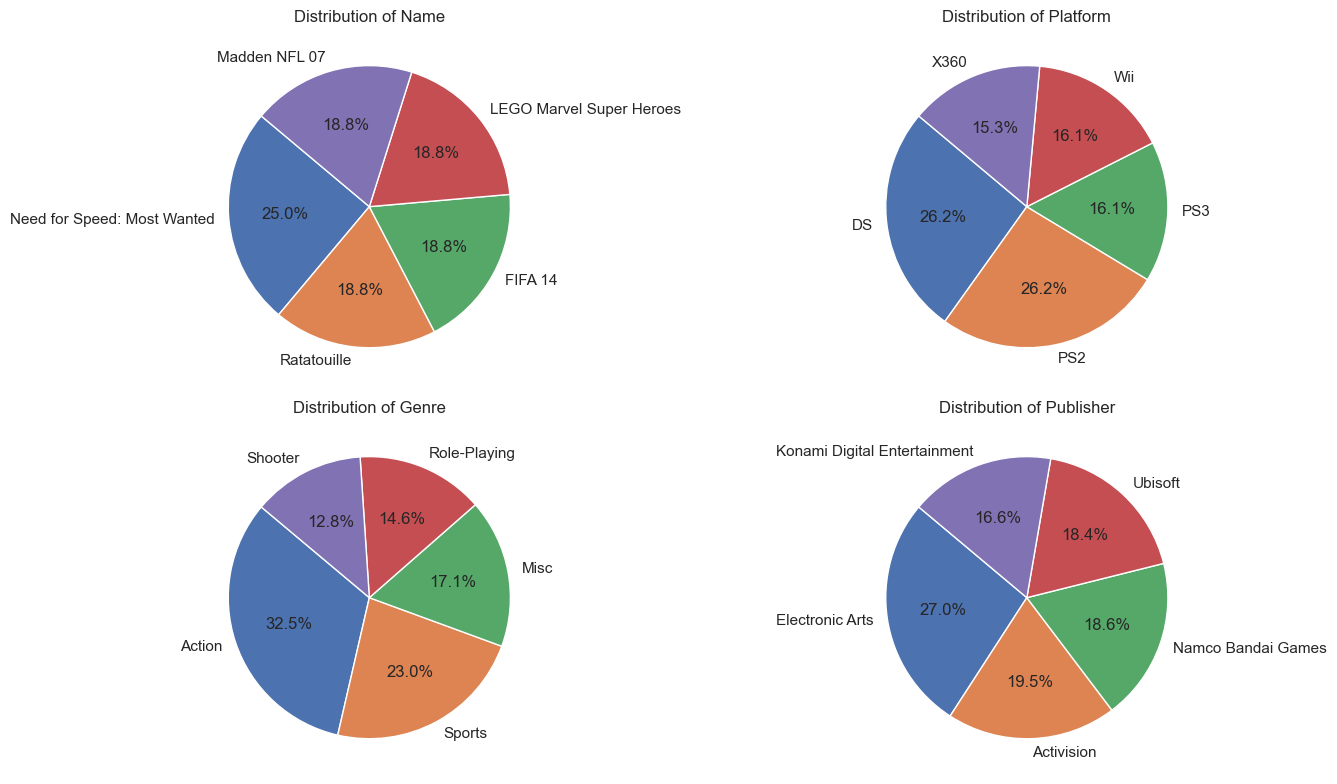

In [33]:
# Categorical variables
categorical_vars = ['Name', 'Platform', 'Genre', 'Publisher']

# Count plots
plt.figure(figsize=(15, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=var, data=df, order=df[var].value_counts().index[:10])
    plt.title(f'Count of {var}')

plt.tight_layout()
plt.show()

# Pie charts for the top categories
plt.figure(figsize=(15, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    top_categories = df[var].value_counts().index[:5]
    sizes = df[var].value_counts(normalize=True).loc[top_categories]
    plt.pie(sizes, labels=top_categories, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

C:\Users\Tariq\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



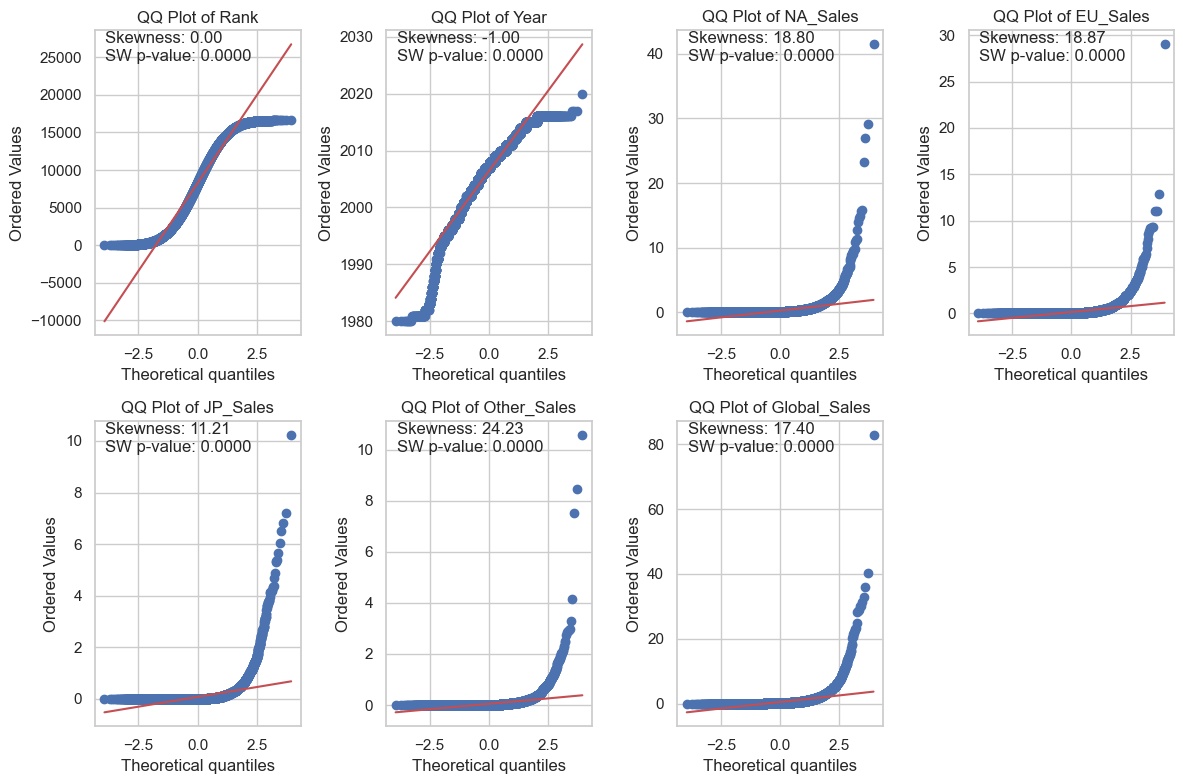

In [35]:
from scipy.stats import probplot, skew, shapiro

plt.figure(figsize=(12, 8))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 4, i)
    
    probplot(df[var].dropna(), plot=plt)
    
    skewness = skew(df[var].dropna())
    
    _, p_value = shapiro(df[var].dropna())
    
    plt.text(0.05, 0.9, f'Skewness: {skewness:.2f}\nSW p-value: {p_value:.4f}', 
             transform=plt.gca().transAxes)
    
    plt.title(f'QQ Plot of {var}')

plt.tight_layout()
plt.show()

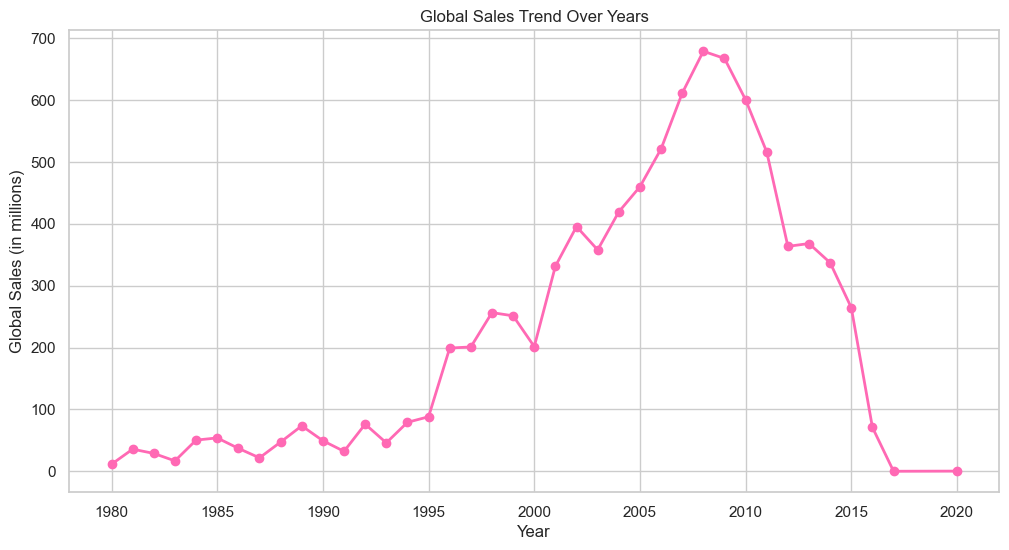

In [36]:
import matplotlib.pyplot as plt
import pandas as pd


df_filtered = df.dropna(subset=['Year'])

sales_trend = df_filtered.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-', color='hotpink', linewidth=2)
plt.title('Global Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()